In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import libraries

import numpy as np
import pandas as pd

# load iris data

iris_df = pd.read_csv('iris.csv')
iris_df.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
# fix the column names
temp = []

for e in iris_df.columns:
  try:
    temp.append(float(e))
  except:
    temp.append(str(e))

print(temp)
c = ['Sepal Len', 'Sepal Width', 'Petal Len', 'Petal Width', 'Class label']
iris_df.columns = c
iris_df.head(5)

temp_df = pd.DataFrame([temp], columns=c)

iris_df = pd.concat([iris_df, temp_df], ignore_index=True)

# check class label and modify
all_labels = iris_df['Class label'].unique()
print(all_labels)

# create dict with values for each label name
label_rename = dict()
count = 0
for e in all_labels:
  label_rename[e] = count
  count += 1

print(label_rename)

iris_df = iris_df.replace(label_rename)
print(iris_df)

[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']


,Sepal Len,Sepal Width,Petal Len,Petal Width,Class label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
     Sepal Len  Sepal Width  Petal Len  Petal Width  Class label
0          4.9          3.0        1.4          0.2            0
1          4.7          3.2        1.3          0.2            0
2          4.6          3.1        1.5          0.2            0
3          5.0          3.6        1.4          0.2            0
4          5.4          3.9        1.7          0.4            0
..         ...          ...        ...          ...          ...
145        6.3          2.5        5.0          1.9            2
146        6.5          3.0        5.2          2.0            2
147        6.2          3.4        5.4          2.3            2
148        5.9          3.0        5.1          1.8            2
149        5.1          3.5        1.4          0.2            0

[150 rows x 5 columns]


In [ ]:
# create numpy arrays with the data
iris_d = iris_df.drop('Class label', axis=1).to_numpy()
iris_l = iris_df['Class label'].to_numpy()



In [ ]:
# split dataset 80/20 train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_d, iris_l, test_size = 0.2)
print(len(X_train))
print(len(X_test))

120
30


In [ ]:
# since we'll use the same method for three datasets,
# let's build functions so we can reuse them

def euclidean(X_train, X_test):
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  dists = np.zeros((num_test, num_train))

  a = [0 for i in range(num_test)]
  b = [0 for i in range(num_train)]

  for i in range(num_test):
      a[i] = sum(X_test[i] ** 2)
  for i in range(num_train):
      b[i] = sum(X_train[i] ** 2)
  for i in range(num_test):
      for j in range(num_train):
          dists[i][j] = a[i] + b[j] - 2 * np.dot(X_test[i], X_train[j])

  return dists

# test function
X_train_te = np.array([[1, 2], [0, 3], [-1, 1]])
X_test_te = np.array([[-1, 0], [2, 1]])
my_dists = euclidean(X_train_te, X_test_te)
print(my_dists)

[[ 8. 10.  1.]
 [ 2.  8.  9.]]


In [ ]:
# find k neighbors 
def find_neighbors(dists, Y_train, k):
  ss = dists.shape[0]
  #print('dist shape',dists.shape)
  neighbors = np.zeros((ss, k))
  #print('y_train shape',Y_train.shape)
  for i in range(ss):
      idx = np.argsort(dists[i])
      for j in range(k):
          neighbors[i][j] = Y_train[idx[j]]

  return neighbors

# test function
k = 3 
y = np.array([0, 1, 1])
neighbors = find_neighbors(my_dists, y, k)
print(neighbors)

[[1. 0. 1.]
 [0. 1. 1.]]


In [ ]:
# predict 
def predict(x_test, x_train, y_tr, k):
  dists = euclidean(x_train, x_test)
  neighbors = find_neighbors(dists, y_tr, k)
  num_test = x_test.shape[0]
  Y_pred = np.zeros(num_test)

  for i in range(num_test):
      labels, count = np.unique(neighbors[i], return_counts=True)
      l = np.argmax(count)
      Y_pred[i] = labels[l]

  return Y_pred

# test function
p = predict(X_test_te, X_train_te, y, 3)
print(p)

[1. 1.]


In [141]:
# test k = 1
X_train, X_test, y_train, y_test = train_test_split(iris_d, iris_l, test_size = 0.2)
pred = predict(X_test, X_train, y_train, 1)
print(pred)
print(y_test)

[2. 2. 0. 1. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2. 0. 0. 2. 1. 1. 2. 0. 1. 1. 0.
 0. 2. 1. 1. 1. 1.]
[2 2 0 2 2 2 0 2 0 2 2 1 1 2 0 0 2 1 1 2 0 1 1 0 0 2 1 1 1 1]


In [ ]:
# testing error rate
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


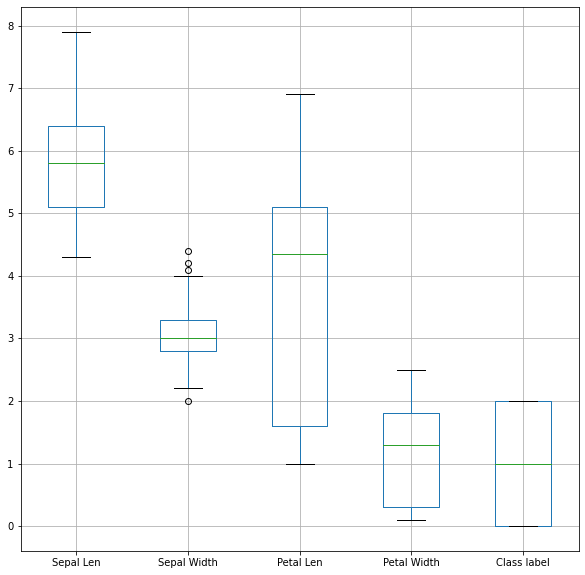

In [ ]:
# compare feature distributions
boxplot = iris_df.boxplot(column=c, figsize=(10,10))

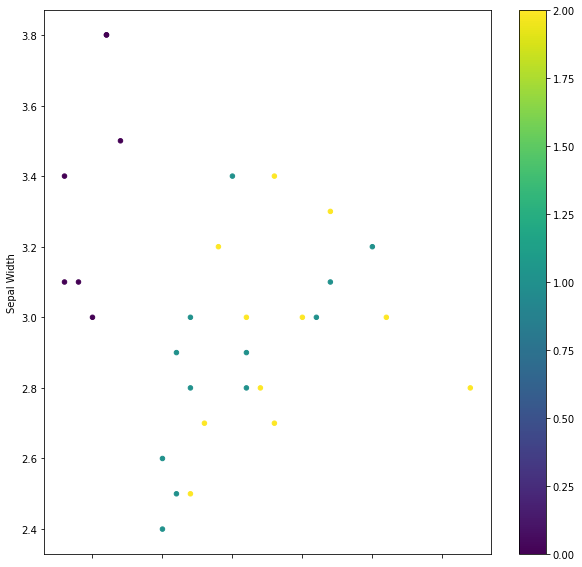

In [ ]:
test_df = pd.DataFrame(X_test, columns=c[:len(c)-1])
test_df.plot(x='Sepal Len', y='Sepal Width', c=pred, colormap='viridis', kind='scatter', figsize=(10,10))












In [ ]:
def meshGrid (x , y , h):
    '''x is data for x-axis meshgrid
       y is data for y-axis meshgrid
       h is stepsize
    '''
    x_min, x_max = x.min() - 1 , x.max() + 1
    y_min, y_max = y.min() - 1 , y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx , yy

In [ ]:
# print full array
import sys
np.set_printoptions(threshold=sys.maxsize)

k = 2


<Figure size 432x288 with 0 Axes>

(3.3, 8.88999999999988)

(1.0, 5.390000000000004)

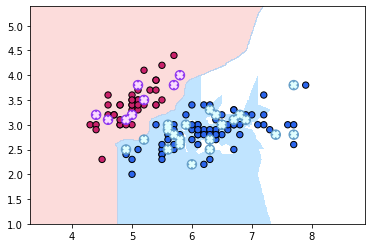

k = 4


<Figure size 432x288 with 0 Axes>

(3.3, 8.88999999999988)

(1.0, 5.390000000000004)

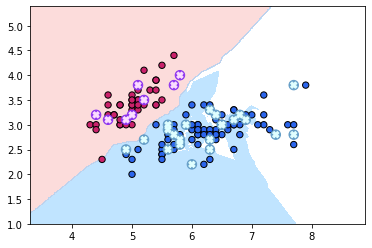

k = 6


<Figure size 432x288 with 0 Axes>

(3.3, 8.88999999999988)

(1.0, 5.390000000000004)

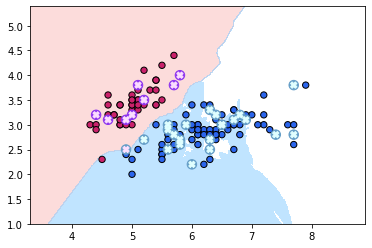

k = 10


<Figure size 432x288 with 0 Axes>

(3.3, 8.88999999999988)

(1.0, 5.390000000000004)

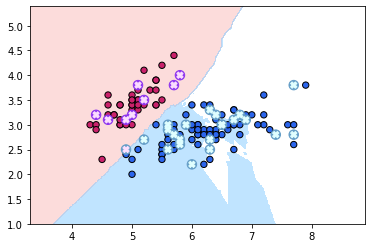

In [142]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

k_list = [2,4,6,10]

#for k in k_list:
#  pred = predict(X_test, X_train, y_train, k)
#  test_df.plot(x='Sepal Len', y='Sepal Width', c=pred, colormap='viridis', kind='scatter', figsize=(10,10))

cmap_light = ListedColormap(['#FBBBB9', '#82CAFF']) 
cmap_bold = ListedColormap(['#CA226B', '#2B65EC']) 
cmap_test = ListedColormap(['#8E35EF', '#659EC7'])
cmap_predict = ListedColormap(['#FCDFFF', '#E0FFFF'])

for k in k_list:
  print('k =',k)
  xx , yy = meshGrid(iris_d[:,0], iris_d[:,1], 0.01)

  pred = predict(X_test[:,[0,1]], X_train[:,[0,1]], y_train, k)
  #print(pred)

  Z = predict(np.c_[xx.ravel(), yy.ravel()], X_train[:,[0,1]], y_train, k)
  #Z = predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()

  plt.contourf(xx, yy, Z, cmap=cmap_light ,levels=[-1, 0, 1] ,alpha = 0.5)

  # For plotting train and test and prediction separatley 
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,edgecolor='k', s=40)
  plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = y_test, cmap=cmap_test,linewidth=1, marker='o', s=90)
  plt.scatter(X_test[:, 0], X_test[:, 1], alpha=1.0,c = pred, cmap=cmap_predict ,linewidth=1, marker='X', s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  plt.show()























  

In [ ]:
from sklearn import metrics
for k in k_list:
  pred = predict(X_test, X_train, y_train, k)
  print('====================================================')
  print('K =',k)
  print(metrics.classification_report(y_test, pred))
  print(metrics.confusion_matrix(y_test, pred))

K = 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.92      0.92        13
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

[[ 7  0  0]
 [ 0 12  1]
 [ 0  1  9]]
K = 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.87      1.00      0.93        13
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

[[ 7  0  0]
 [ 0 13  0]
 [ 0  2  8]]
K = 6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00    

In [ ]:
# 2
c = ['Variance', 'Skewness', 'Kurtois', 'Entropy', 'Class']
bank_df = pd.read_csv('data_banknote_authentication.csv', names=c)
display(bank_df)
bank_l = bank_df['Class'].to_numpy()
bank_d = bank_df.drop('Class',axis=1).to_numpy()

,Variance,Skewness,Kurtois,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_d, bank_l, test_size = .2)

In [ ]:
print(len(X_test))
print(len(X_train))
print(np.unique(y_train))

pred = predict(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))


275
1097
[0 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[148   0]
 [  0 127]]


"\n# TESTING WITH SKLEARN SINCE MY ACCURACY IS SUSPICIOUSLY 1.00\nfrom sklearn.neighbors import KNeighborsClassifier\nneigh = KNeighborsClassifier(n_neighbors=2, metric='euclidean')\nneigh.fit(X_train, y_train)\np = neigh.predict(X_test)\nprint(metrics.classification_report(y_test, p))\nprint(metrics.confusion_matrix(y_test, p))\n"

In [ ]:
# utilizing argmin instead of argmax
def predict2(x_test, x_train, y_tr, k):
  dists = euclidean(x_train, x_test)
  neighbors = find_neighbors(dists, y_tr, k)
  num_test = x_test.shape[0]
  Y_pred = np.zeros(num_test)

  for i in range(num_test):
      labels, count = np.unique(neighbors[i], return_counts=True)
      l = np.argmin(count)
      Y_pred[i] = labels[l]

  return Y_pred

pred2 = predict2(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, pred2))
print(metrics.confusion_matrix(y_test, pred2))
print('No change')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[148   0]
 [  0 127]]
No change


In [ ]:
import math
def manhattan(x_train, x_test):
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  features = X_test.shape[1]
  dists = np.zeros((num_test, num_train), dtype=int)

  for i in range(num_test):
    for j in range(num_train):
      for k in range(features):
        dists[i][j] =+ abs(X_test[i][k] - X_train[j][k])+random(0,1000)
  return dists
  

def minkowski(x_train, x_test):
  p = 3
  num_test = X_test.shape[0]
  num_train = X_train.shape[0]
  features = X_test.shape[1]
  dists = np.zeros((num_test, num_train), dtype=int)

  for i in range(num_test):
    for j in range(num_train):
      for k in range(features):
        dists[i][j] =+ (abs(X_test[i][k] - X_train[j][k]))**p

  for i in range(num_test):
    for j in range(num_train):
      dists[i][j] = (dists[i][j])**(1/p)
  return dists



In [ ]:
def predict_manhattan(x_test, x_train, y_tr, k):
  dists = manhattan(x_train, x_test)
  neighbors = find_neighbors(dists, y_tr, k)
  num_test = x_test.shape[0]
  Y_pred = np.zeros(num_test, dtype=int)

  for i in range(num_test):
      labels, count = np.unique(neighbors[i], return_counts=True)
      l = np.argmax(count)
      Y_pred[i] = labels[l]

  return Y_pred

pred3 = predict2(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, pred3))
print(metrics.confusion_matrix(y_test, pred3))
print('No change')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[148   0]
 [  0 127]]
No change


"\n# TESTING WITH SKLEARN SINCE MY ACCURACY IS SUSPICIOUSLY 1.00\nfrom sklearn.neighbors import KNeighborsClassifier\nneigh = KNeighborsClassifier(n_neighbors=2, metric='manhattan')\nneigh.fit(X_train, y_train)\np = neigh.predict(X_test)\nprint(metrics.classification_report(y_test, p))\nprint(metrics.confusion_matrix(y_test, p))\n\n"

"\n# TESTING WITH SKLEARN SINCE MY ACCURACY IS SUSPICIOUSLY 1.00\nfrom sklearn.neighbors import KNeighborsClassifier\nneigh = KNeighborsClassifier(n_neighbors=2, metric='minkowski')\nneigh.fit(X_train, y_train)\np = neigh.predict(X_test)\nprint(metrics.classification_report(y_test, p))\nprint(metrics.confusion_matrix(y_test, p))\n"

In [ ]:
def predict_mink(x_test, x_train, y_tr, k):
  dists = minkowski(x_train, x_test)
  neighbors = find_neighbors(dists, y_tr, k)
  num_test = x_test.shape[0]
  Y_pred = np.zeros(num_test)

  for i in range(num_test):
      labels, count = np.unique(neighbors[i], return_counts=True)
      l = np.argmax(count)
      Y_pred[i] = labels[l]

  return Y_pred


pred4 = predict2(X_test, X_train, y_train, 2)
print(metrics.classification_report(y_test, pred4))
print(metrics.confusion_matrix(y_test, pred4))
print('No change')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[148   0]
 [  0 127]]
No change


In [ ]:
# 3
t = [500, 1000, 2500, 5000, 10000]

# load all data
data_train = np.loadtxt("mnist_train.csv", delimiter=",")
data_test = np.loadtxt("mnist_test.csv",  delimiter=",") 


In [ ]:
# extract labels
y_train = data_train[:,0]
y_test = data_test[:,0]

In [ ]:
print(y_train[:20])
print(y_test[:20])
print(len(y_train))
print(len(y_test))

[5. 0. 4. 1. 9. 2. 1. 3. 1. 4. 3. 5. 3. 6. 1. 7. 2. 8. 6. 9.]
[7. 2. 1. 0. 4. 1. 4. 9. 5. 9. 0. 6. 9. 0. 1. 5. 9. 7. 3. 4.]
60000
10000


In [ ]:
# remove first column with labels
X_test = data_test[:,1:]
X_train = data_train[:,1:]

In [140]:
err = []
results = []
for e in t:
  print('Training examples:',e)
  pred6 = predict(X_test[:1000], X_train[:e], y_train[:e], 2)
  print(metrics.classification_report(y_test[:1000], pred6))
  err.append(np.mean(pred6 != y_test[:1000]))
  results.append(pred6)
  print('-------------------------------------------')

Training examples: 500
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90        85
         1.0       0.66      1.00      0.79       126
         2.0       0.88      0.61      0.72       116
         3.0       0.74      0.83      0.78       107
         4.0       0.79      0.86      0.82       110
         5.0       0.76      0.59      0.66        87
         6.0       0.88      0.75      0.81        87
         7.0       0.81      0.78      0.79        99
         8.0       0.86      0.48      0.62        89
         9.0       0.73      0.80      0.76        94

    accuracy                           0.77      1000
   macro avg       0.79      0.77      0.77      1000
weighted avg       0.79      0.77      0.77      1000

-------------------------------------------
Training examples: 1000
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89        85
         1.0       0.82      1.00      0.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Error rate by k')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

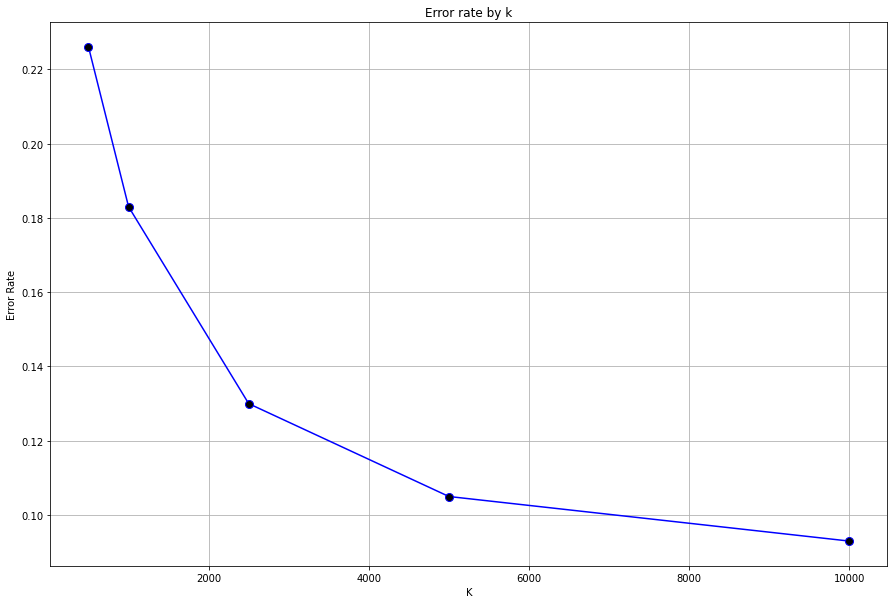

In [139]:
plt.figure(figsize=(15,10))
plt.plot(t,err,color='blue', marker='o', markerfacecolor='black', markersize=8)
plt.title('Error rate by k')
plt.xlabel('K')
plt.grid()
plt.ylabel('Error Rate')

In [138]:
print('The best model is with',t[err.index(min(err))],'training examples.',min(err)*100,'%')
print("It's confusing matrix is:")
print(metrics.confusion_matrix(y_test[:1000], results[err.index(min(err))]))

The best model is with 10000 training examples. 9.3 %
It's confusing matrix is:
[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  3   3 103   0   1   0   0   5   1   0]
 [  0   1   1  98   0   1   1   2   1   2]
 [  0   2   0   0 101   0   1   0   1   5]
 [  1   1   0   8   0  76   0   1   0   0]
 [  3   0   0   0   1   0  83   0   0   0]
 [  0   5   0   0   2   1   0  91   0   0]
 [  2   3   2   7   1   4   1   1  67   1]
 [  0   1   0   1   9   1   0   4   1  77]]
